___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___


<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Yago\Desktop\Faculdade\2 Semestre\Ciencia dos dados\Aula 2\Atividade


In [13]:
dados = pd.read_table("pes2013A.txt", encoding="windows-1252", sep=" ")

In [123]:
dados.head()
pd.DataFrame(dados.iloc[0:5,22])

,V6002
1,NaN
2,NaN
3,2.0
4,NaN
5,4.0


In [46]:
n=dados.shape[0]


In [396]:
dados.SEXO = dados.V0302.astype('category')
dados.COR = dados.V0404.astype('category')
dados.RE = dados.V6002.astype('category') #Re é rede de ensino
dados.NE = dados.V4802.astype('category') #nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)
dados.REGIAO = dados.UF.astype('category') 
dados.LE = dados.V0601.astype('category') # Sabe ler ou escrever
dados.EC = dados.V0602.astype('category') # Frequenta escola ou creche

## Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.

**Sexo:**

In [407]:
dados.SEXO.cat.categories = ('Masculino', 'Feminino')
ut1 = (dados.SEXO.value_counts()/n*100).round(decimals=1).reindex(['Masculino', 'Feminino'])
print(ut1)

Masculino    48.6
Feminino     51.4
dtype: float64


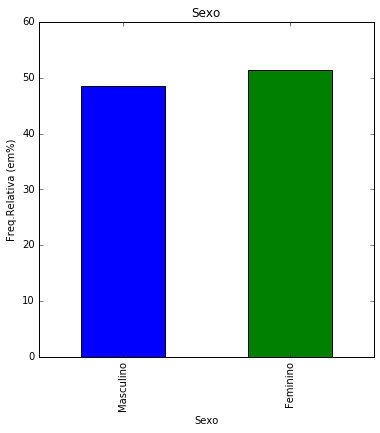

In [138]:
plot = ut1.plot(kind='bar',title='Sexo',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')

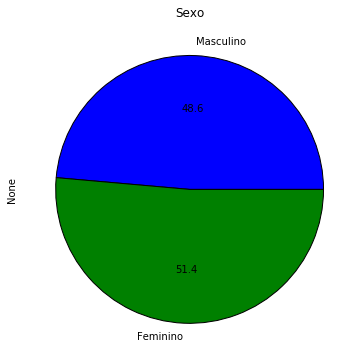

In [139]:
plot = ut1.plot(kind='pie',title='Sexo',autopct='%.1f',figsize=(6, 6))

**Cor ou raça:**

In [427]:
dados.COR.cat.categories = ('Amarela', 'Branca', 'Preta', 'Indígena', 'Parda', 'Sem declaração')
ut2 = (dados.COR.value_counts()/n*100).round(decimals=1)
print(ut2)

Parda             48.0
Branca            42.8
Preta              8.3
Amarela            0.5
Indígena           0.4
Sem declaração     0.0
dtype: float64


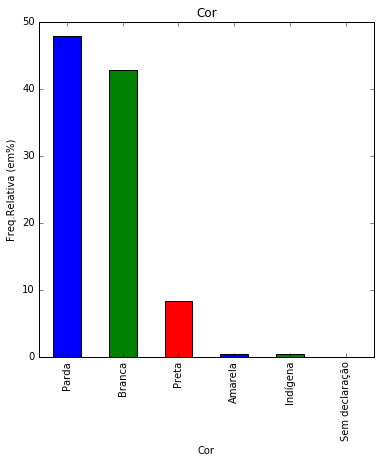

In [369]:
plot = ut2.plot(kind='bar',title='Cor',figsize=(6, 6),color=('b','g','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Cor')

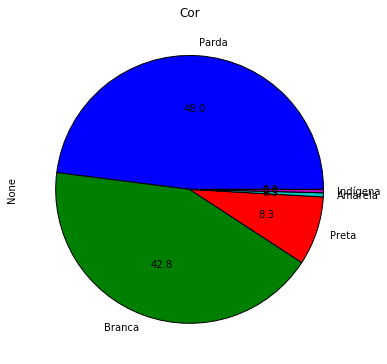

In [370]:
plot = ut2.plot(kind='pie',title='Cor',autopct='%.1f',figsize=(6, 6))

**Rede de ensino:**

In [307]:
dados.RE.cat.categories = ('Pública', 'Privada')
ut3 = (dados.RE.value_counts()/n*100).round(decimals=1).reindex(['Pública', 'Privada'])
print(ut3) 

Pública    21.5
Privada     6.9
dtype: float64


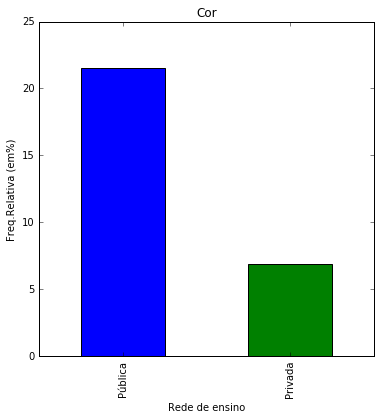

In [308]:
plot = ut3.plot(kind='bar',title='Cor',figsize=(6, 6),color=('b','g','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Rede de ensino')

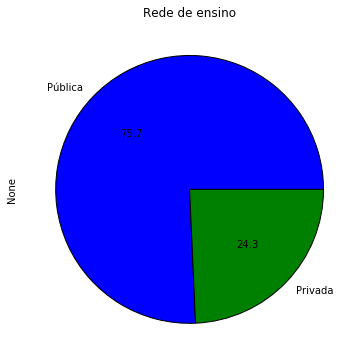

In [309]:
plot = ut3.plot(kind='pie',title='Rede de ensino',autopct='%.1f',figsize=(6, 6))

**Nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)**

In [419]:
ut4 = (dados.NE.value_counts()/n*100).round(decimals=1).reindex(['2ª a 5ª séries do ensino fundamental regular em 9 anos',
'6ª a 9ª séries do ensino fundamental regular em 9 anos',                                       
'Ensino médio, inclusive pré-vestibular' ,                                                      
'Superior, inclusive mestrado ou doutorado' ,                                                   
'Maternal, jardim de infância etc.',                                                            
'1ª série do ensino fundamental regular em 9 anos',                                            
'5ª a 8ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos',    
'1ª a 4ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos'  ,  
'Classe de alfabetização'    ,                                                                  
'Educação de jovens e adultos não seriado do ensino fundamental'  ,                             
'Alfabetização de adultos' ])
print(ut4)

2ª a 5ª séries do ensino fundamental regular em 9 anos                                       7.0
6ª a 9ª séries do ensino fundamental regular em 9 anos                                       6.3
Ensino médio, inclusive pré-vestibular                                                       4.8
Superior, inclusive mestrado ou doutorado                                                    3.8
Maternal, jardim de infância etc.                                                            1.7
1ª série do ensino fundamental regular em 9 anos                                             1.6
5ª a 8ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos    0.6
1ª a 4ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos    0.3
Classe de alfabetização                                                                      0.3
Educação de jovens e adultos não seriado do ensino fundamental                               0.1
Alfabetização de adultos      

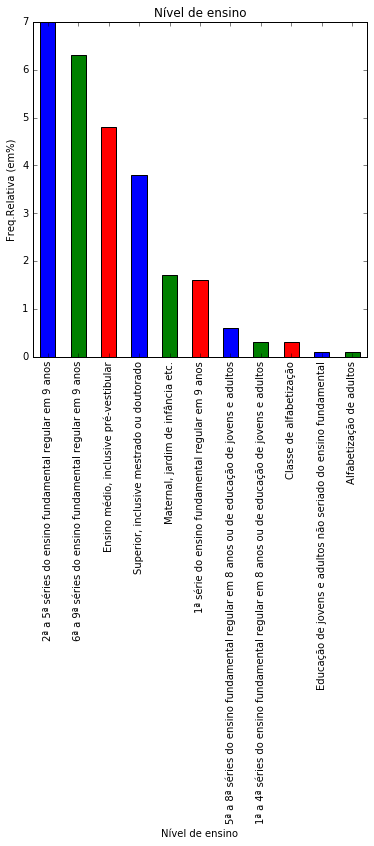

In [420]:
plot = ut4.plot(kind='bar',title='Nível de ensino',figsize=(6, 6),color=('b','g','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Nível de ensino')

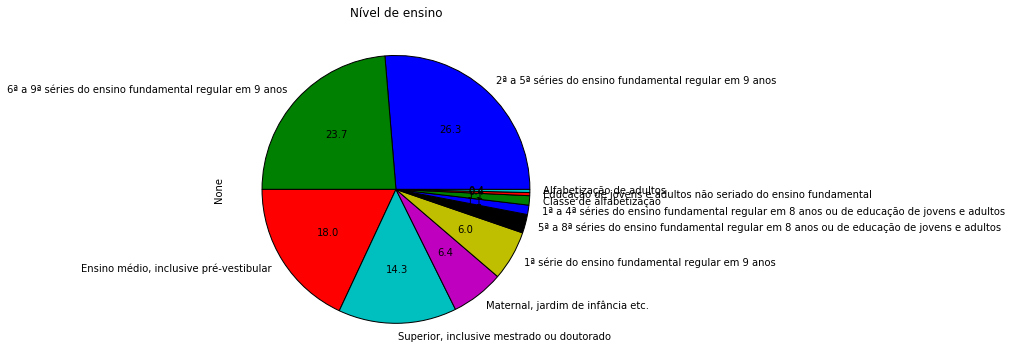

In [421]:
plot = ut4.plot(kind='pie',title='Nível de ensino',autopct='%.1f',figsize=(6, 6))

**Região**

In [404]:
dados.REGIAO.cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal')
ut5 = (dados.REGIAO.value_counts()/n*100).round(decimals=1).reindex(['São Paulo', 'Minas Gerais', 'Bahia','Rio Grande do Sul', 'Rio de Janeiro', 'Pará', 'Pernambuco', 'Ceará', 'Paraná', 'Goiás', 'Amazonas', 'Santa Catarina', 'Distrito Federal', 'Maranhão', 'Mato Grosso', 'Rondônia', 'Espírito Santo', 'Tocantins', 'Mato Grosso do Sul', 'Paraíba','Sergipe','Piauí','Alagoas','Rio Grande do Norte','Acre', 'Amapá','Roraima'])
print(ut5)

São Paulo              10.9
Minas Gerais            9.1
Bahia                   7.5
Rio Grande do Sul       7.5
Rio de Janeiro          7.1
Pará                    6.2
Pernambuco              5.7
Ceará                   5.3
Paraná                  5.3
Goiás                   4.1
Amazonas                3.6
Santa Catarina          2.7
Distrito Federal        2.6
Maranhão                2.6
Mato Grosso             2.0
Rondônia                2.0
Espírito Santo          1.9
Tocantins               1.8
Mato Grosso do Sul      1.7
Paraíba                 1.7
Sergipe                 1.7
Piauí                   1.5
Alagoas                 1.5
Rio Grande do Norte     1.4
Acre                    1.2
Amapá                   0.8
Roraima                 0.8
dtype: float64


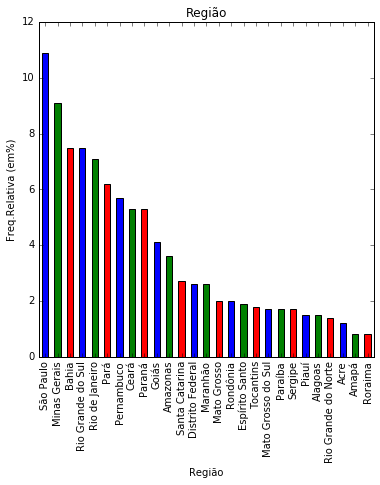

In [378]:
plot = ut5.plot(kind='bar',title='Região',figsize=(6, 6),color=('b','g','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Região')

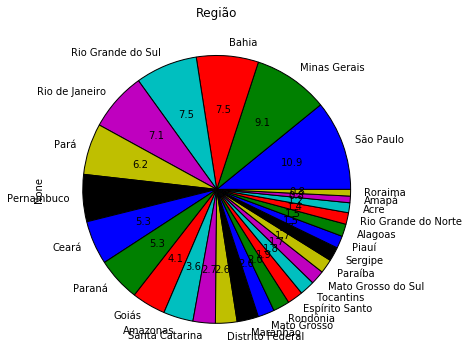

In [379]:
plot = ut5.plot(kind='pie',title='Região',autopct='%.1f',figsize=(6, 6))

**Sabe ler e escrever**

In [382]:
ut6 = (dados.LE.value_counts()/n*100).round(decimals=1)
print(ut6)

Sim    84.2
Não    15.8
dtype: float64


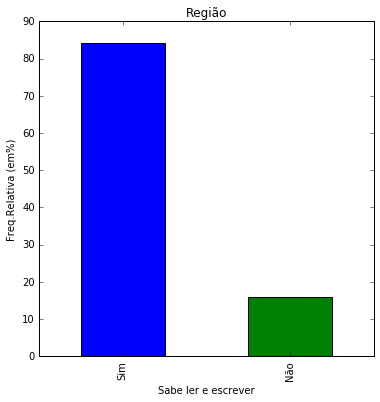

In [383]:
plot = ut6.plot(kind='bar',title='Região',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sabe ler e escrever')

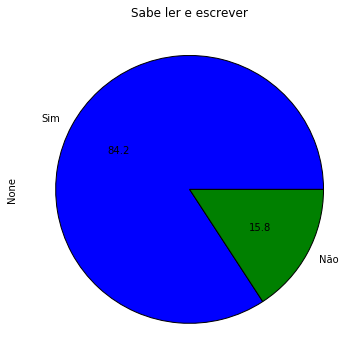

In [384]:
plot = ut6.plot(kind='pie',title='Sabe ler e escrever',autopct='%.1f',figsize=(6, 6))

**Frequenta escola ou creche**

In [387]:
ut7 = (dados.EC.value_counts()/n*100).round(decimals=1)
print(ut7)

Não    71.6
Sim    28.4
dtype: float64


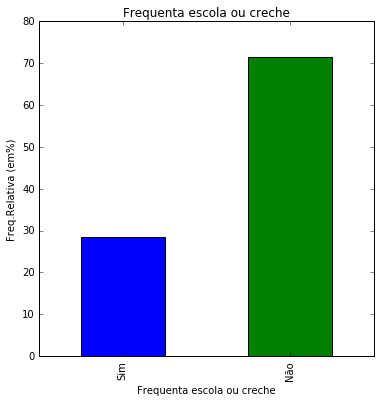

In [192]:
plot = ut7.plot(kind='bar',title='Frequenta escola ou creche',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Frequenta escola ou creche')

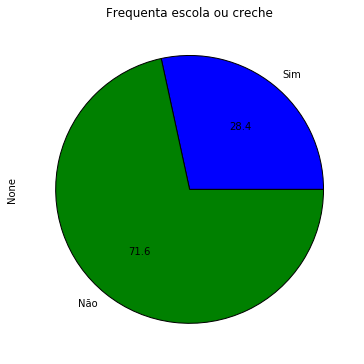

In [194]:
plot = ut7.plot(kind='pie',title='Frequenta escola ou creche',autopct='%.1f',figsize=(6, 6))

## Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


**Região em função do sexo**

In [408]:
print('Tabela Cruzada por total GERAL:')
ct=pd.crosstab(dados.REGIAO,dados.SEXO,margins=True,rownames=['Região'], colnames=['Sexo'])
ct=ct.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct

Tabela Cruzada por total GERAL:


Sexo,Masculino,Feminino,All
Região,,,
Rondônia,3609,3511,7120
Acre,2226,2249,4475
Amazonas,6538,6485,13023
Roraima,1395,1372,2767
Pará,11110,11345,22455
Amapá,1445,1445,2890
Tocantins,3169,3288,6457
Maranhão,4591,4679,9270
Piauí,2720,2872,5592


In [409]:
print('Tabela Cruzada por total GERAL (em %):')
ct1=(ct/len(dados)*100).round(decimals=0)
ct1

Tabela Cruzada por total GERAL (em %):


Sexo,Masculino,Feminino,All
Região,,,
Rondônia,1.0,1.0,2.0
Acre,1.0,1.0,1.0
Amazonas,2.0,2.0,4.0
Roraima,0.0,0.0,1.0
Pará,3.0,3.0,6.0
Amapá,0.0,0.0,1.0
Tocantins,1.0,1.0,2.0
Maranhão,1.0,1.0,3.0
Piauí,1.0,1.0,2.0


In [410]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.REGIAO,dados.SEXO,margins=True,rownames=['Região'], colnames=['Sexo']).apply(percConvert, axis=1)
ct2=ct2.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct2

Tabela Cruzada por total de LINHAS (em %):


Sexo,Masculino,Feminino,All
Região,,,
Rondônia,51.0,49.0,100.0
Acre,50.0,50.0,100.0
Amazonas,50.0,50.0,100.0
Roraima,50.0,50.0,100.0
Pará,49.0,51.0,100.0
Amapá,50.0,50.0,100.0
Tocantins,49.0,51.0,100.0
Maranhão,50.0,50.0,100.0
Piauí,49.0,51.0,100.0


**Região em função da alfabetização**

In [330]:
print('Tabela Cruzada por total GERAL:')
ct=pd.crosstab(dados.REGIAO,dados.LE,margins=True,rownames=['Região'], colnames=['Sabe ler e escrever'])
ct=ct.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct

Tabela Cruzada por total GERAL:


Sabe ler e escrever,Sim,Não,All
Região,,,
Rondônia,5984,1136,7120
Acre,3394,1081,4475
Amazonas,10546,2477,13023
Roraima,2213,554,2767
Pará,18412,4043,22455
Amapá,2438,452,2890
Tocantins,5154,1303,6457
Maranhão,6695,2575,9270
Piauí,4133,1459,5592


In [331]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.REGIAO,dados.LE,margins=True,rownames=['Região'], colnames=['Sabe ler e escrever']).apply(percConvert, axis=1)
ct2=ct2.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct2

Tabela Cruzada por total de LINHAS (em %):


Sabe ler e escrever,Sim,Não,All
Região,,,
Rondônia,84.0,16.0,100.0
Acre,76.0,24.0,100.0
Amazonas,81.0,19.0,100.0
Roraima,80.0,20.0,100.0
Pará,82.0,18.0,100.0
Amapá,84.0,16.0,100.0
Tocantins,80.0,20.0,100.0
Maranhão,72.0,28.0,100.0
Piauí,74.0,26.0,100.0


**Região em função do nível de ensino**

In [422]:
dados.NE.cat.categories = ('Maternal, jardim de infância etc.',
'Classe de alfabetização',
'Alfabetização de adultos',
'1ª a 4ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos',
'5ª a 8ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos',
'1ª série do ensino fundamental regular em 9 anos',
'2ª a 5ª séries do ensino fundamental regular em 9 anos', 
'6ª a 9ª séries do ensino fundamental regular em 9 anos',
'Educação de jovens e adultos não seriado do ensino fundamental',
'Ensino médio, inclusive pré-vestibular',
'Superior, inclusive mestrado ou doutorado')

def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.REGIAO,dados.NE,margins=True,rownames=['Região'], colnames=['Nível de ensino']).apply(percConvert, axis=1)
ct2=ct2.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct2 = ct2.iloc[(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27),(9,10)]
ct2

Tabela Cruzada por total de LINHAS (em %):


Nível de ensino,"Ensino médio, inclusive pré-vestibular","Superior, inclusive mestrado ou doutorado"
Região,,
Rondônia,5.0,3.0
Acre,5.0,4.0
Amazonas,6.0,4.0
Roraima,5.0,5.0
Pará,6.0,3.0
Amapá,6.0,5.0
Tocantins,6.0,4.0
Maranhão,6.0,2.0
Piauí,5.0,3.0


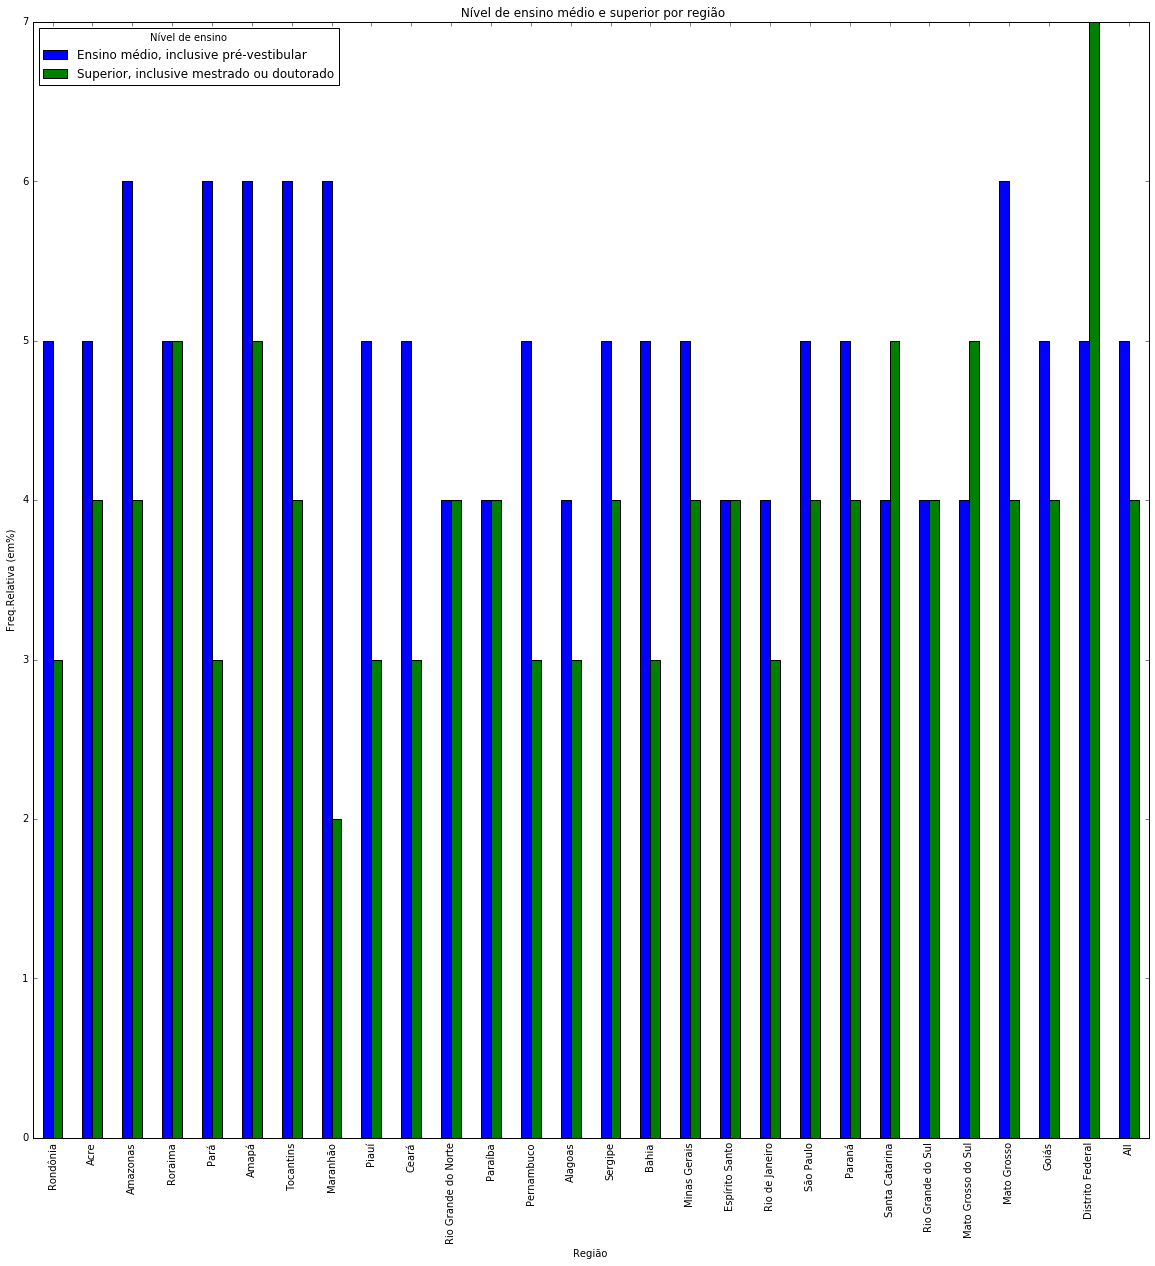

In [423]:
plot = ct2.plot(kind='bar',title=' Nível de ensino médio e superior por região',figsize=(20, 20),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Região')

**Regiões cujo nível de ensimo médio é elevado e o ensino superior é baixo:**

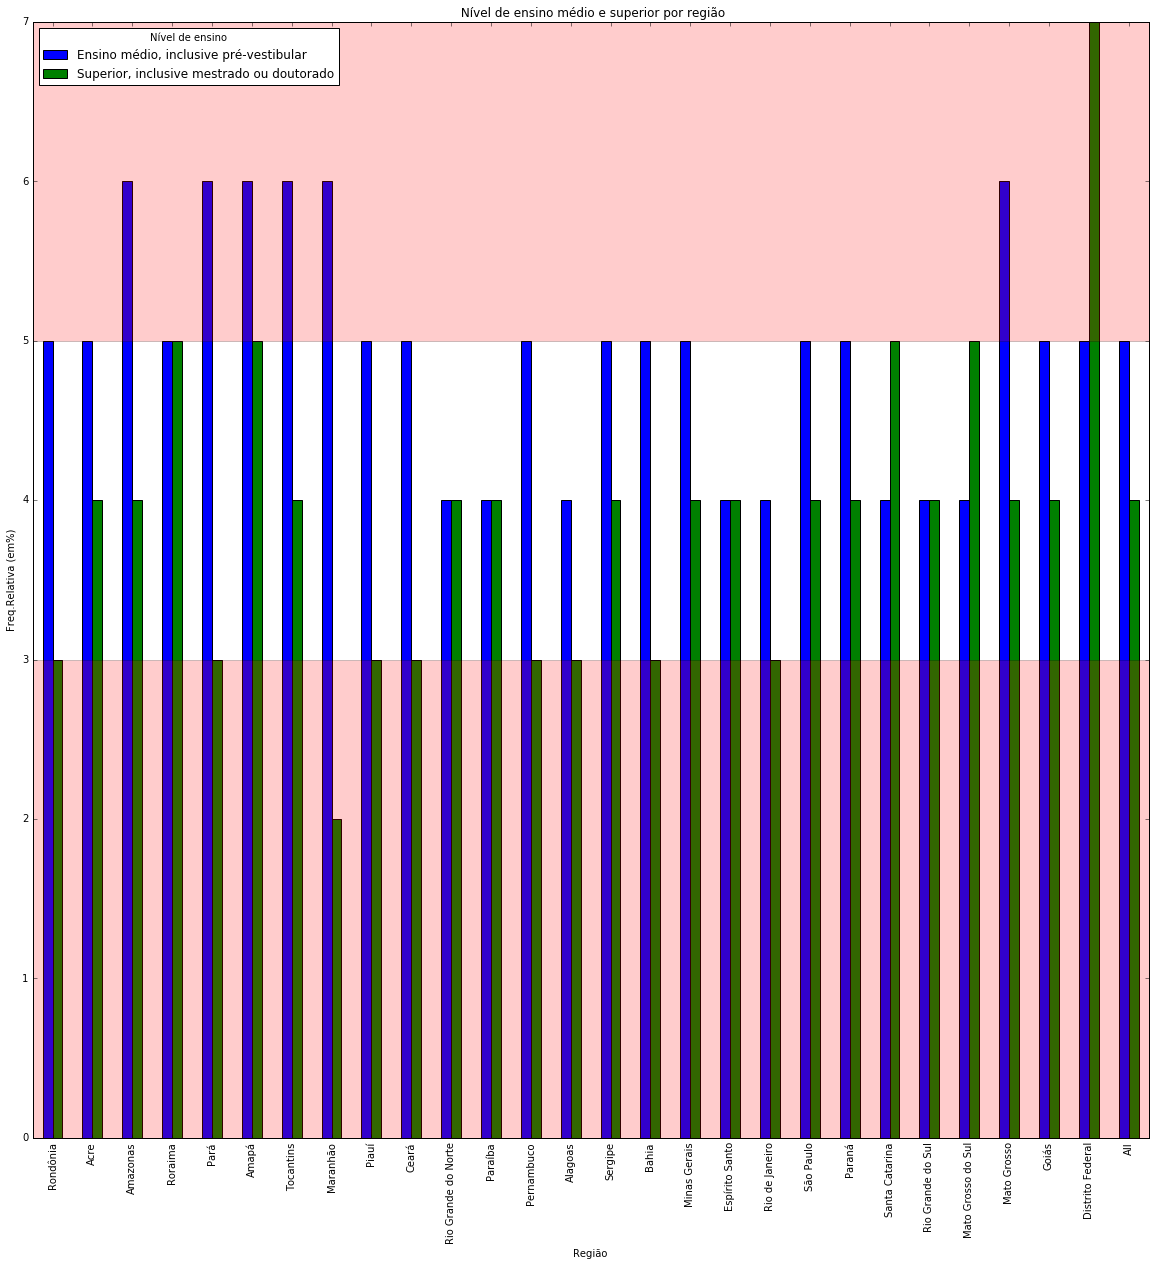

In [424]:
plot = ct2.plot(kind='bar',title=' Nível de ensino médio e superior por região',figsize=(20, 20),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Região')
plt.axhspan(5, 7, facecolor='r', alpha=0.2)
plt.axhspan(0, 3, facecolor='r', alpha=0.2)

**As regiões que se enquadrão nesse perfil são:**

    Pará e Maranhão, sendo Piauí a melhor opção devido ao nível de Ensino superior ser menor

**Região em função da frequência de escola**

In [432]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.REGIAO,dados.EC,margins=True,rownames=['Região'], colnames=['Frequenta a escola ou creche']).apply(percConvert, axis=1)
ct2=ct2.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct2

Tabela Cruzada por total de LINHAS (em %):


Frequenta a escola ou creche,Sim,Não,All
Região,,,
Rondônia,29.0,71.0,100.0
Acre,36.0,64.0,100.0
Amazonas,35.0,65.0,100.0
Roraima,33.0,67.0,100.0
Pará,32.0,68.0,100.0
Amapá,36.0,64.0,100.0
Tocantins,32.0,68.0,100.0
Maranhão,35.0,65.0,100.0
Piauí,32.0,68.0,100.0


**Região em função da raça**

In [431]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.REGIAO,dados.COR,margins=True,rownames=['Região'], colnames=['Cor/Raça']).apply(percConvert, axis=1)
ct2=ct2.loc[['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal','All']]
ct2

Tabela Cruzada por total de LINHAS (em %):


Cor/Raça,Amarela,Branca,Preta,Indígena,Parda,Sem declaração,All
Região,,,,,,,
Rondônia,0.0,35.0,7.0,0.0,58.0,0.0,100.0
Acre,4.0,22.0,7.0,0.0,67.0,0.0,100.0
Amazonas,3.0,22.0,4.0,0.0,71.0,0.0,100.0
Roraima,4.0,22.0,10.0,0.0,63.0,0.0,100.0
Pará,1.0,21.0,9.0,0.0,69.0,0.0,100.0
Amapá,0.0,25.0,10.0,0.0,65.0,0.0,100.0
Tocantins,0.0,24.0,8.0,0.0,68.0,0.0,100.0
Maranhão,0.0,20.0,12.0,0.0,67.0,0.0,100.0
Piauí,0.0,25.0,6.0,0.0,68.0,0.0,100.0


**Frequência da escola em função da raça**

In [430]:
dados.EC.cat.categories = ('Sim',
'Não',)
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.EC,dados.COR,margins=True,rownames=['Frequenta escola ou creche'], colnames=['Cor/Raça']).apply(percConvert, axis=1)
ct2=ct2.loc[['Sim','Não','All']]
ct2

Tabela Cruzada por total de LINHAS (em %):


Cor/Raça,Amarela,Branca,Preta,Indígena,Parda,Sem declaração,All
Frequenta escola ou creche,,,,,,,
Sim,1.0,41.0,7.0,0.0,51.0,0.0,100.0
Não,0.0,44.0,9.0,0.0,47.0,0.0,100.0
All,0.0,43.0,8.0,0.0,48.0,0.0,100.0


**Alfabetização em função da raça**

In [428]:
dados.LE.cat.categories = ('Sim',
'Não',)
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de LINHAS (em %):')
ct2=pd.crosstab(dados.LE,dados.COR,margins=True,rownames=['Sabe ler e escrever'], colnames=['Cor/Raça']).apply(percConvert, axis=1)
ct2=ct2.loc[['Sim','Não','All']]
ct2

Tabela Cruzada por total de LINHAS (em %):


Cor/Raça,Amarela,Branca,Preta,Indígena,Parda,Sem declaração,All
Sabe ler e escrever,,,,,,,
Sim,0.0,44.0,8.0,0.0,47.0,0.0,100.0
Não,1.0,36.0,8.0,0.0,55.0,0.0,100.0
All,0.0,43.0,8.0,0.0,48.0,0.0,100.0


**Regioes**

In [461]:
faixa = range(10,70,10)
VariavelCateg1 = pd.cut(dados.UF, faixa)
REGIAO = VariavelCateg1.value_counts(True)*100
REGIAO

(30, 40]    28.996428
(20, 30]    28.849968
(40, 50]    17.223042
(10, 20]    16.324971
(50, 60]     8.605591
dtype: float64

In [462]:
VariavelCateg1.cat.categories = ('Norte',
'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')
REGIAO = VariavelCateg1.value_counts(True)*100
REGIAO
#VariavelCateg1.reindex(['Nordeste', 'Sudeste', 'Norte', 'Sul', 'Centro-Oeste'])

Sudeste         28.996428
Nordeste        28.849968
Sul             17.223042
Norte           16.324971
Centro-Oeste     8.605591
dtype: float64

In [465]:
ct10=pd.crosstab(VariavelCateg1,dados.COR,margins=True,rownames=['Região'], colnames=['Cor/Raça']).apply(percConvert, axis=1)
ct10

Cor/Raça,Amarela,Branca,Preta,Indígena,Parda,Sem declaração,All
Região,,,,,,,
Norte,2.0,24.0,7.0,0.0,67.0,0.0,100.0
Nordeste,0.0,27.0,10.0,0.0,62.0,0.0,100.0
Sudeste,0.0,51.0,9.0,1.0,39.0,0.0,100.0
Sul,0.0,74.0,5.0,1.0,20.0,0.0,100.0
Centro-Oeste,0.0,40.0,7.0,0.0,53.0,0.0,100.0
All,0.0,43.0,8.0,0.0,48.0,0.0,100.0


In [477]:
ct11=pd.crosstab(VariavelCateg1,dados.NE,margins=True,rownames=['Região'], colnames=['Nível de escolaridade']).apply(percConvert, axis=1)
ct11 = ct11.iloc[(0,1,2,3,4),(9,10)]
ct11

Nível de escolaridade,"Ensino médio, inclusive pré-vestibular","Superior, inclusive mestrado ou doutorado"
Região,,
Norte,6.0,4.0
Nordeste,5.0,3.0
Sudeste,5.0,4.0
Sul,4.0,4.0
Centro-Oeste,5.0,5.0


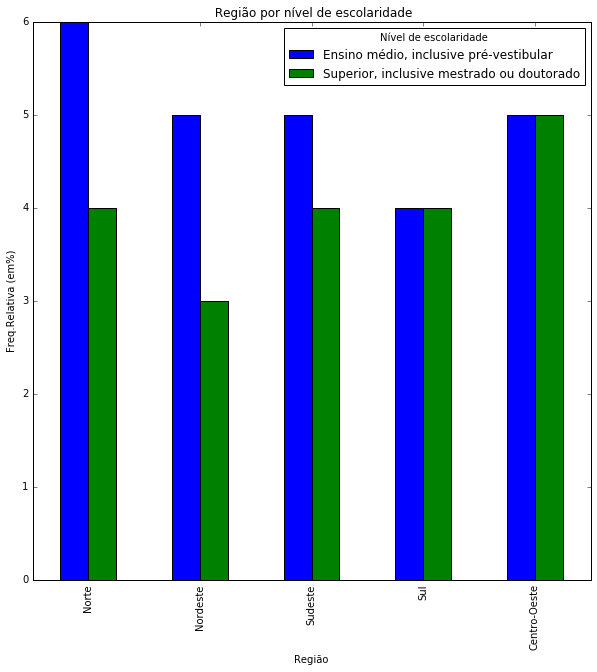

In [478]:
plot = ct11.plot(kind='bar',title=' Região por nível de escolaridade',figsize=(10, 10),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Região')

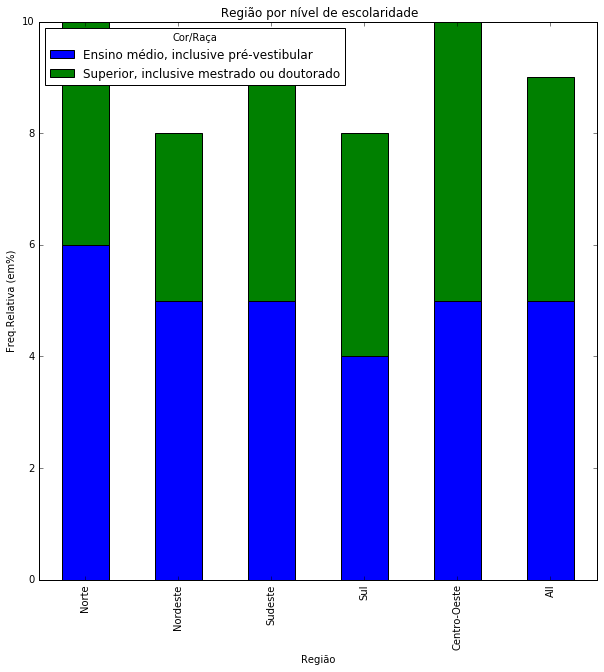

In [471]:
plot = ct11.plot(kind='bar',title=' Região por nível de escolaridade',stacked=True, figsize=(10, 10),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Região')